In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="6"

import sys
sys.path.append("../")

import mitsuba as mi
import drjit as dr
from matplotlib import pyplot as plt
import numpy as np
import skimage as ski
from helpers.polarization_helpers import *
from helpers.render_helpers import *

print(mi.variants())
mi.set_variant("cuda_ad_spectral_polarized")

['scalar_rgb', 'scalar_spectral', 'scalar_spectral_polarized', 'llvm_ad_rgb', 'llvm_ad_mono', 'llvm_ad_mono_polarized', 'llvm_ad_spectral', 'llvm_ad_spectral_polarized', 'cuda_ad_rgb', 'cuda_ad_mono', 'cuda_ad_mono_polarized', 'cuda_ad_spectral', 'cuda_ad_spectral_polarized']


In [3]:
def to_ski_image(image):
	image[image < 0] = 0

	image = np.array(image ** (1.0 / 2.2))
	image = np.uint8(image * 255.0)
	image = np.clip(image, 0, 255)

	return image

In [11]:
scene = mi.load_file("../../scenes/marcus_light_sphere.xml")

In [6]:
img_0, img_90 = render_from_angle(scene, 4, np.pi/2, 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0092806965..1.1856097].


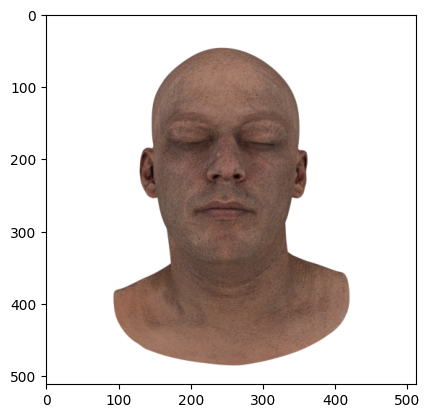

In [8]:
plt.imshow(img_0 ** (1.0 / 2.2))
plt.show()

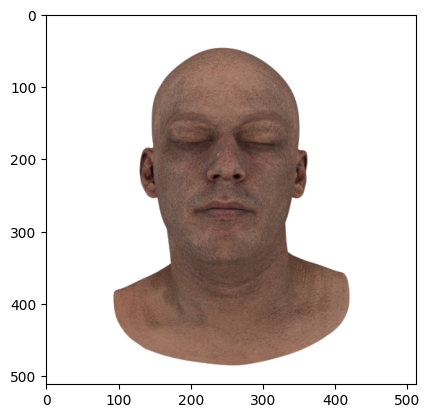

In [18]:
img = img_0.numpy().copy()
img[img < 0] = 0
img = img ** (1.0 / 2.2)
img = np.clip(img, 0, 1)
img = np.uint8(img * 255.0)

plt.imshow(img)
plt.show()

In [10]:
radius = 4
theta = np.pi/2
phi = np.pi

camera_position = spherical_to_cartesian(radius, theta, phi)
transform = mi.ScalarTransform4f().look_at(origin=camera_position, target=[0, 0, 0], up=[0, 1, 0])
view_matrix = transform.matrix.numpy()

print(view_matrix)

[[ 1.0000000e+00 -7.4987995e-33 -1.2246469e-16  4.8985874e-16]
 [ 0.0000000e+00  1.0000000e+00 -6.1232343e-17  2.4492937e-16]
 [ 1.2246469e-16  6.1232343e-17  1.0000000e+00 -4.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]]


In [18]:
params = mi.traverse(scene)
print(params)
print(params["sensor.film.size"])
width, height = params["sensor.film.size"]
print(width)
print(height)
fov = params["sensor.x_fov"][0]
print(fov)

SceneParameters[
  -------------------------------------------------------------------------------------------------------------------
  Name                                                            Flags    Type              Parent
  -------------------------------------------------------------------------------------------------------------------
  sensor.near_clip                                                         float             PerspectiveCamera
  sensor.far_clip                                                          float             PerspectiveCamera
  sensor.shutter_open                                                      float             PerspectiveCamera
  sensor.shutter_open_time                                                 float             PerspectiveCamera
  sensor.film.size                                                         ScalarVector2u    HDRFilm
  sensor.film.crop_size                                                    ScalarVector2u    HDRFilm
 